In [147]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt

In [148]:

rates_frame = pd.read_csv("EURUSD.csv")


# prepare data for prophet
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

p = int(0.025*len(rates_frame))


df = pd.DataFrame()
df["ds"]     = rates_frame["time"]
df["y"]      = rates_frame["close"]

In [149]:
def predict_prices():

    # fit prophet model
    model = Prophet()

    model.fit(df)

    # predict future p closing prices
    future = model.make_future_dataframe(periods=p, freq='5min')

    forecast = model.predict(future)


    # plot predicted vs actual values
    model.plot(forecast)
    plt.show()

    return forecast

 


02:26:39 - cmdstanpy - INFO - Chain [1] start processing
02:28:50 - cmdstanpy - INFO - Chain [1] done processing


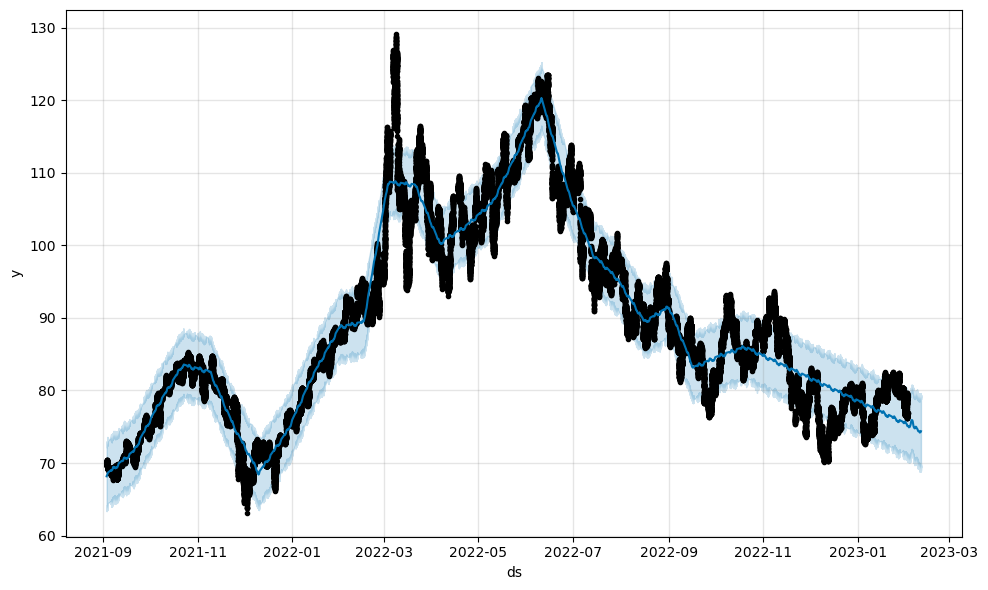

In [150]:
forecast            = predict_prices()

In [151]:
'''
def is_sorted(lst, ascending=True):
    return all(lst[i] <= lst[i + 1] for i in range(len(lst) - 1)) if ascending else all(lst[i] >= lst[i + 1] for i in range(len(lst) - 1))

actual_prices          = list(rates_frame["close"].iloc[-p:])
predicted_prices       = forecast['yhat'][-2*p:].tolist()
upper_predicted_prices = forecast['yhat_upper'][-2*p:].tolist()
lower_predicted_prices = forecast['yhat_lower'][-2*p:].tolist()

x1 = range(len(actual_prices))
x2 = range(len(predicted_prices))


plt.plot(x1, actual_prices, 'b*-', label='actual_prices')
plt.plot(x2, predicted_prices, 'r-', label='predicted_prices')
plt.plot(x2, upper_predicted_prices, 'r--', label='upper_predicted_prices')
plt.plot(x2, lower_predicted_prices, 'r--', label='lower_predicted_prices')
plt.axvline(x=len(actual_prices), color='green')
#plt.legend()
plt.show()

print(is_sorted(predicted_prices[-p:]))
print(is_sorted(predicted_prices[-p:],ascending = False)) # For descending Order
'''

'\ndef is_sorted(lst, ascending=True):\n    return all(lst[i] <= lst[i + 1] for i in range(len(lst) - 1)) if ascending else all(lst[i] >= lst[i + 1] for i in range(len(lst) - 1))\n\nactual_prices          = list(rates_frame["close"].iloc[-p:])\npredicted_prices       = forecast[\'yhat\'][-2*p:].tolist()\nupper_predicted_prices = forecast[\'yhat_upper\'][-2*p:].tolist()\nlower_predicted_prices = forecast[\'yhat_lower\'][-2*p:].tolist()\n\nx1 = range(len(actual_prices))\nx2 = range(len(predicted_prices))\n\n\nplt.plot(x1, actual_prices, \'b*-\', label=\'actual_prices\')\nplt.plot(x2, predicted_prices, \'r-\', label=\'predicted_prices\')\nplt.plot(x2, upper_predicted_prices, \'r--\', label=\'upper_predicted_prices\')\nplt.plot(x2, lower_predicted_prices, \'r--\', label=\'lower_predicted_prices\')\nplt.axvline(x=len(actual_prices), color=\'green\')\n#plt.legend()\nplt.show()\n\nprint(is_sorted(predicted_prices[-p:]))\nprint(is_sorted(predicted_prices[-p:],ascending = False)) # For descendi